# 统计方法与机器学习-实验报告6

温兆和 10205501432

## 数据预处理

### 1.从scikit-learn包中载入数据集diabetes

In [11]:
#下载本次实验的Python包
from sklearn.datasets import load_diabetes

import os

import pandas as pd
import numpy as np
import random
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

from sklearn import preprocessing # Data Preprocessing
import statsmodels.api as sm # LSE, Ridge Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF 
from statsmodels.multivariate.pca import PCA # PCR
#下载Python内置的数据集diabetes
Data = load_diabetes()

### 2.通过阅读以下参考文献，定义清楚问题背景、数据中响应变量和自变量的概念、取值范围等信息。

我们先把diabetes数据集打印出来，看看里面是什么样。

In [12]:
print(Data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

可以发现，这个数据集是字典形式的，它的三个key分别为data,feature_names和target。我们先对这个字典进行拆分并合成一个dataframe。

In [32]:
data = Data['data']
target = Data['target']
feature_names = Data['feature_names']
d_t = data
d_t=np.insert(d_t,10,target,axis = 1)
feature_names = np.append(feature_names,'trend')
DataFrame = pd.DataFrame(d_t,columns=feature_names)
DataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,trend
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


通过阅读参考文献，我们可以发现这个数据集中自变量是糖尿病人的年龄、性别、血压等十个生理数据，因变量是病人一年后的糖尿病发展情况，样本量为$n=442$，研究的是病人的生理数据与一年后病情发展情况之间的关系。

### 3.以自己的学号作为随机种子，采用留出法划分训练集和测试集，样本比例为7.5:2.5。
基于第二步得出的结论，我们设置好本次实验的样本量和自变量个数，并将学号作为随机数种子，以指定的比例划分训练集和测试集。

In [33]:
#设置样本量和自变量个数
p = 10
n = 442
#设置训练集和测试集的样本比例以及随机数种子
n_train = n*0.75 # 75% instances used for training
n_train=int(n_train)
n_test = n-n_train
seed = 10205501432
random.seed(seed)
index = range(0,n)
index_selected = random.sample(index,n_train)
index_selected.sort()
#划分训练集和测试集
Data_train = DataFrame.loc[index_selected]
Data_test = DataFrame.drop(index = index_selected)

训练集为

In [34]:
Data_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,trend
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


测试集为

In [35]:
Data_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,trend
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
19,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008943,-0.054925,168.0


接下去，我们对自变量进行标准化，对响应变量进行中心化，并试着建立一个线性回归模型。

In [36]:
#分离响应变量和自变量
X_train = Data_train.drop(columns = ['trend'],axis = 1)
Y_train = Data_train.trend
X_test = Data_test.drop(columns = ["trend"],axis=1)
Y_test = Data_test.trend
#对自变量标准化，对响应变量中心化
X_train_standardized = preprocessing.scale(X_train, with_mean = True, with_std=True)/np.sqrt(n_train)
Y_train_centered = preprocessing.scale(Y_train, with_mean = True, with_std=False)
Y_train_mean = np.average(Y_train)
X_test_standardized = preprocessing.scale(X_test, with_mean = True, with_std=True)/np.sqrt(n_test)
#建立线性回归模型
X_train_withintercept = sm.add_constant(X_train)
model = sm.OLS(Y_train,X_train_withintercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trend   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     34.31
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           5.05e-45
Time:                        17:56:07   Log-Likelihood:                -1791.8
No. Observations:                 331   AIC:                             3606.
Df Residuals:                     320   BIC:                             3647.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.7292      3.047     49.798      0.000     145.735     157.724
age            4.2004     69.869      0.060      0.952    -133.260     141.661
sex         -256.3444     72.689     -3.527      0.000    -399.354    -113.335
bmi          543.5499     80.946      6.715      0.000     384.297     702.803
bp           351.1830     77.235      4.547      0.000     199.231     503.135
s1          -605.1774    483.221     -1.252      0.211   -1555.870     345.515
s2           350.0540    386.887      0.905      0.366    -411.109    1111.217
s3            66.8753    248.600      0.269      0.788    -422.221     555.972
s4           183.0709    190.874      0.959      0.338    -192.455     558.597
s5           675.7595    197.010      3.430      0.001     288.162    1063.357
s6            83.2832     76.834      1.084      0.279     -67.880     234.446
==============================================================================
Omnibus:                        2.285   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.950
Skew:                           0.067   Prob(JB):                        0.377
Kurtosis:                       2.648   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 模型构建
在本次实验中我们将自变量的一次项、二次项（包括交互项）作为特征，利用训练集构建模型。
### 4.判断用于建模的特征数据中是否存在多重共线性？提供合适的判断方案。
多重共线性是指自变量之间的线性相关性。我们先绘制热力图，直观、定性地看一看自变量之间是否有线性相关的情况。

<AxesSubplot:>

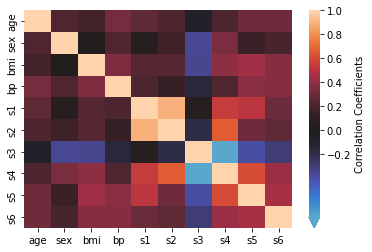

In [37]:
pcorr = X_train.corr(method = 'pearson')
tick_ = (np.arange(0,13,2)-2)/10
dict_ = {"orientation":'vertical',
         'label':'Correlation Coefficients',
         "drawedges":False,
         "ticklocation":"top",
         "extend":"min",
        "filled":True,
         "alpha":0.8,
         "cmap":"cmap",
         "ticks":tick_}
sns.heatmap(pcorr,cbar_kws= dict_,center=0)

在这张热力图中，某一格颜色越浅说明这两个自变量之间的线性相关程度越深。通过观察我们发现，$s1$与$s2$、$s2$与$s4$、$s4$与$s5$对应格子的颜色较浅，这几对变量可能线性相关，数据中可能存在多重共线性。但总体来说，程度并不严重。

接下去我们再用方差扩大因子法来检验数据中是否存在多重共线性。如果记$\mathbf{X_s}$为标准化后的自变量，则矩阵$\mathbf{X_s}^T\mathbf{X_s}$的第$j$个对角元$c_{jj}$就是第$j$个自变量$x_{j}$的方差扩大因子。事实上，如果我们把$x_{j}$作为响应变量，其它自变量作为自变量建立线性回归模型，记$R_j$为其复决定系数，可以证明$$c_{jj}=\frac{1}{1-R_j^2}$$由于$R_j$衡量$x_{j}$与其它自变量之间的线性相关性，$R_j$越大，方差扩大因子$c_{jj}$越大，自变量$x_{j}$与其它自变量的多重共线性就越严重。所以，只要这个方差扩大因子大于某一个特定的值(这里设为$5$)，我们就认为$x_{j}$与其它自变量之间存在多重共线性。

下面，我们就来计算一下各个自变量的方差扩大因子。

In [38]:
C = np.linalg.inv(np.dot(X_train_standardized.T,X_train_standardized))
VIF_1 = np.diag(C)
print("The VIF's are", np.round(VIF_1,2))

The VIF's are [ 1.24  1.29  1.48  1.4  56.8  36.45 15.66  9.    9.96  1.46]


在以上十个方差扩大因子中，$s1$和$s2$的方差扩大因子明显大于其它自变量的，也大于我们设定的临界值$5$。所以我们认为这两个自变量与其它自变量之间可能存在多重共线性。但如果我们把临界值设置得稍高一点就能认为这个数据集不存在多重共线性，所以它的多重共线性程度应该不严重。

接下去，我们再用特征值法来判断数据中是否存在多重共线性。当某些自变量之间存在线性相关，$$\mathbf{X_s}^T\mathbf{X_s}\approx 0$$所以$\mathbf{X_s}^T\mathbf{X_s}$必然有一些特征值非常接近于零。我们将自变量矩阵的条件数记为最大特征值比最小特征值的算数平方根，即$$\kappa=\sqrt{\frac{\lambda_1}{\lambda_p}}$$这个条件数越大，就说明自变量的多重共线性就越严重。所以，当条件数大于某个特定的值，我们就认为自变量之间存在多重共线性。

我们先来计算矩阵$\mathbf{X_s}^T\mathbf{X_s}$的特征值：

In [39]:
R = np.dot(X_train_standardized.T,X_train_standardized)
W, V = np.linalg.eig(R)
W = -1* np.sort(-1*W)
W_diag = np.diag(W)
V = V.T
print("The eigen values are", np.round(W,4))

The eigen values are [3.9197 1.4955 1.2379 1.0236 0.6481 0.5986 0.5523 0.4363 0.0791 0.0089]


我们已经可以看到，只有最小的特征值非常接近于零，所以某一对自变量之间可能存在线性相关性。我们再来计算这个自变量矩阵的条件数：

In [40]:
Condition_Number = np.sqrt(np.max(W)/np.min(W))
print("The condition number is",np.round(Condition_Number,4))

The condition number is 20.9599


条件数的临界值通常为$10$，$100$或$1000$。如果临界值设置得比较小，我们就会认为这个模型存在多重共线性。但这个条件数也不算太大，说明多重共线性的程度并不算严重，可能知识一对自变量之间存在线性相关。这个结论和前面的热力图中得到的结论是一致的。

### 5.构建线性回归模型Model_1、岭回归模型Model_2、主成分回归模型Model_3。

线性回归模型已经在上面建立完毕。现在我们来建立岭回归模型。在岭回归模型中，我们对矩阵$\mathbf{X^TX}$加上$k\mathbf{I}$，从而使得得到的矩阵与原来的$\mathbf{X^TX}$差别不大，并避免$\mathbf{X^TX}$奇异。最终，我们得到的岭回归值就是$$\hat{\beta(k)}=(\mathbf{X^TX}+k\mathbf{I})^{-1}\mathbf{X^Ty}$$
显然，这个岭回归值是超参数$k$的函数。所以，我们首先要确定$k$的值，使得我们得到的岭回归值最优。我们来绘制岭迹图：

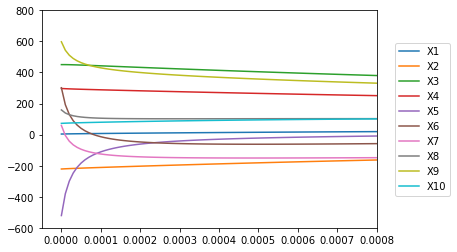

In [45]:
alpha_num = 100
alpha_vec = np.array(list(range(0,alpha_num)))/alpha_num/1000
RR_coef = []
RR_vif = []

for alpha in alpha_vec:
    rr_model = sm.OLS(Y_train_centered,X_train_standardized).fit_regularized(L1_wt=0,alpha = alpha)
    rr_coef = rr_model.params
    RR_coef.append(rr_coef)
for i in range(p):
    plt.plot(alpha_vec, np.array(RR_coef)[:,i],label = "X%d"%(i+1))

plt.axis([-0.00005,0.0008,-600,800])    
plt.legend(loc="right",bbox_to_anchor=(1.25,0.5),borderaxespad=1)

实际上，岭迹就是岭估计$\hat{\beta(k)}$中的各个分量，岭迹图就是岭迹与$k$之间的函数图像。我们需要观察$k$为何值时各个回归系数的岭估计趋于稳定且符号合理。但是这种方法完全依靠对图像的观察，太过主观。所以，我们用方差扩大因子法确定最优的超参数$k$。方差扩大因子法是指，找到合适的$k$使得岭估计的方差扩大因子都小于某个特定的值，并由这个$k$值得到$\beta$的岭回归估计。

In [47]:
#找到最优的超参数
vif_cv = 5
C_k = []
for alpha in alpha_vec:
    k = alpha * n_train
    c_k = np.linalg.inv(X_train_standardized.T @ X_train_standardized + k * np.eye(p)) @ X_train_standardized.T @ X_train_standardized @ np.linalg.inv(X_train_standardized.T @ X_train_standardized + k * np.eye(p))
    C_k.append(np.mean(np.diag(c_k)))
#根据这个最优的超参数进行岭估计
alpha_best = alpha_vec[np.min(np.where(np.array(C_k) < vif_cv))]
model_rr_best = sm.OLS(Y_train_centered,X_train_standardized).fit_regularized(L1_wt=0,alpha = alpha_best)
model_rr_best_coef = model_rr_best.params
print("The parameters in the ridge regression are ",np.round(model_rr_best.params,2))

The parameters in the ridge regression are  [   5.16 -217.83  449.47  293.62 -247.32   89.51  -65.92  121.26  490.15
   75.35]


下面我们再来构建主成分回归模型。主成分回归的思想就是，用更少的、线性无关的自变量来代替原来存在多重共线性的自变量，并构建线性回归模型。与此同时，新的自变量还需要包含原来的自变量所携带的绝大部分信息。如果一个主成分还不足以代表绝大部分原来的自变量的信息，我们还要寻找更多的主成分。最终要寻找多少个主成分，是主成分回归中的超参数。我们先来确定这个超参数。我们可以通过观察每添加一个主成分之后信息量增加了多少，来直观判断到底要不要继续添加主成分。

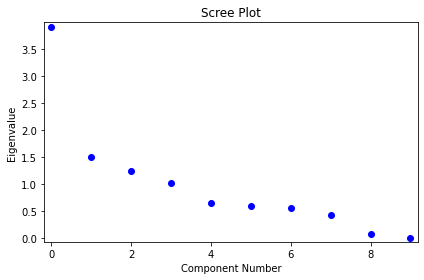

In [49]:
model_pca = PCA(X_train_standardized,standardize = False, demean = True)
model_pca_cr = model_pca.eigenvals
model_pca_ccr = np.cumsum(model_pca_cr)/p 
fig = model_pca.plot_scree(log_scale = False)

可见，在添加了第八个主成分之后再继续添加主成分，信息量的增量就近乎于零了。接着，我们来精确地计算添加几个主成分，主成分的信息贡献率之和能够达到某个特定的值（如$0.99$）。

In [65]:
pca_cv = 0.99
num_pca = np.min(np.where(model_pca_ccr > pca_cv))
print("The appropriate number of component is", (num_pca+1))

The appropriate number of component is 8


可见，我们只需要添加八个主成分就足以得到原来的自变量的绝大多数信息了。这和刚刚的直观判断一致。接着，我们构建八个主成分并将它们作为自变量构建线性回归模型，求出参数的估计值：

In [66]:
model_pca_selected = PCA(X_train_standardized,  standardize = False,  demean = True)
V = model_pca_selected.loadings
Z_train_standardized= X_train_standardized @ V[:,0:(num_pca+1)]
model_pcr = sm.OLS(Y_train_centered, Z_train_standardized).fit()
model_pcr_coef = V.T @ np.pad(model_pcr.params,(0,p-(num_pca+1)))
print(model_pcr_coef)

[ 130.31215246  136.06580728 -436.52054774 -203.77442486   38.96226138
  129.73132689  190.27005177 -451.85875602   49.04930972 -171.09751143]


## 模型评价
### 6.利用RMSE，比较Model_1、Model_2、Model_3在测试集上的预测效果。请进行评论。

最后，我们就要在训练集上检验以上三种模型的预测效果了。评判的指标是训练集预测值和训练集真实值之间的均方误差$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2}$$显然，当$RMSE$越小，该模型预测的准确度越高。

我们先来对线性回归模型进行检验：

In [55]:
model_ols = sm.OLS(Y_train_centered,X_train_standardized).fit()
model_ols_coef = model_ols.params 
Y_pred_ols = Y_train_mean + X_test_standardized @ model_ols_coef
ols_rmse = np.sqrt(np.mean((Y_pred_ols-Y_test)**2))
print("The RMSE in the ordinary regression is", round(ols_rmse,4))

The RMSE in the ordinary regression is 69.7124


再检验岭回归模型：

In [68]:
Y_pred_rr = Y_train_mean + X_test_standardized @ model_rr_best_coef
rr_rmse = np.sqrt(np.mean((Y_pred_rr-Y_test)**2))
print("The RMSE in the ridge regression is", round(rr_rmse,4))

The RMSE in the ridge regression is 69.0157


最后再来检验主成分回归模型：

In [67]:
Y_pred_pcr = Y_train_mean + X_test_standardized @ model_pcr_coef
pcr_rmse = np.sqrt(np.mean((Y_pred_pcr-Y_test)**2))
print("The RMSE in the ordinary regression is", round(pcr_rmse,4))

The RMSE in the ordinary regression is 148.5936


我们看到，岭回归模型的$RMSE$值最小，线性回归模型的$RMSE$略大于岭回归模型的，而主成分回归模型的$RMSE$明显大于另外两个模型。可见，在这个数据集上，主成分回归模型明显劣与另外两个，而岭回归模型的优势也不显著。可能的原因是因为这个数据集的多重共线性程度本身就不高，所以不必也不应该再用更少的主成分去代替原来的自变量。岭回归估计优于主成分回归的可能原因是$\mathbf{X^TX}+k\mathbf{I}$与$\mathbf{X^TX}$的差别本来就不大。

## 参考文献
[1] https://scikit-learn.org/stable/datasets/toy_dataset.html

[2] https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html